In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Importing the required libraries for data manipulation and analysis
import pandas as pd

# Loading the uploaded dataset into a Pandas DataFrame
file_path = 'breast cancer.csv'
df = pd.read_csv(file_path)

# Displaying the first few rows of the DataFrame to get an overview of the data
df.head()


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [3]:
from sklearn.preprocessing import LabelEncoder

# Creating a new DataFrame to store the label-encoded data
encodedvalue = df.copy()

# Identifying categorical columns and performing label encoding
for col in df.columns:
    if df[col].dtype == 'object':
        label_encoder = LabelEncoder()
        encodedvalue[col] = label_encoder.fit_transform(df[col])

# Displaying the first few rows of the label-encoded DataFrame
encodedvalue.head()


id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [4]:
from sklearn.model_selection import train_test_split

# Defining the feature variables (X) and the target variable (y)
X = encodedvalue.drop(['id', 'diagnosis'], axis=1)
y = encodedvalue['diagnosis']

# Splitting the data into training and testing sets (80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((455, 30), (114, 30), (455,), (114,))

In [5]:

# RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize RFE (Recursive Feature Elimination) with the Random Forest Classifier
rfe = RFE(estimator=rf_classifier, n_features_to_select=1, step=1)

# Fit RFE on the training data
rfe = rfe.fit(X_train, y_train)

# Get the ranking of features based on their importance in prediction
feature_ranking = rfe.ranking_

# Create a DataFrame to display feature rankings
feature_ranking_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Rank': feature_ranking
})

# Sort features based on their rankings
sorted_ranking_df = feature_ranking_df.sort_values(by='Rank')

# Fit the Random Forest Classifier on the training data using only the top-ranked features
sortedfeatures= sorted_ranking_df['Feature'].iloc[:10].to_list() # chekcing top 10 features how it affect accuracy
X_train_top = X_train[sortedfeatures]
X_test_top = X_test[sortedfeatures]

rf_classifier.fit(X_train_top, y_train)

# Make predictions and calculate accuracy
y_pred = rf_classifier.predict(X_test_top)
accuracy = accuracy_score(y_test, y_pred)

sorted_ranking_df, accuracy


(                    Feature  Rank
 22          perimeter_worst     1
 7       concave points_mean     2
 27     concave points_worst     3
 23               area_worst     4
 20             radius_worst     5
 6            concavity_mean     6
 2            perimeter_mean     7
 21            texture_worst     8
 26          concavity_worst     9
 1              texture_mean    10
 0               radius_mean    11
 3                 area_mean    12
 24         smoothness_worst    13
 25        compactness_worst    14
 28           symmetry_worst    15
 12             perimeter_se    16
 13                  area_se    17
 10                radius_se    18
 4           smoothness_mean    19
 5          compactness_mean    20
 19     fractal_dimension_se    21
 29  fractal_dimension_worst    22
 16             concavity_se    23
 18              symmetry_se    24
 9    fractal_dimension_mean    25
 14            smoothness_se    26
 15           compactness_se    27
 8             symme

In [ ]:
# the top 10 most relevant features for predicting the target variable ('diagnosis') are as follows:

#     perimeter_worst
#     concave points_mean
#     concave points_worst
#     area_worst
#     radius_worst
#     concavity_mean
#     perimeter_mean
#     texture_worst
#     concavity_worst
#     texture_mean

#Using only these top 10 features, I trained a Random Forest Classifier and achieved an accuracy of approximately 96.49%96.49%.

In [ ]:
# After getting the features using top 10 , trained the model using classification algorithms Logistic Regression, SVM, Random Forest, and Naive Bayes.
# and check accuracy based on performance metrics accuracy , precision , f1score , recall , ruc auc etc use test data for this.
# draw a proper table showing performance metrics with respect to each model and bar plot.

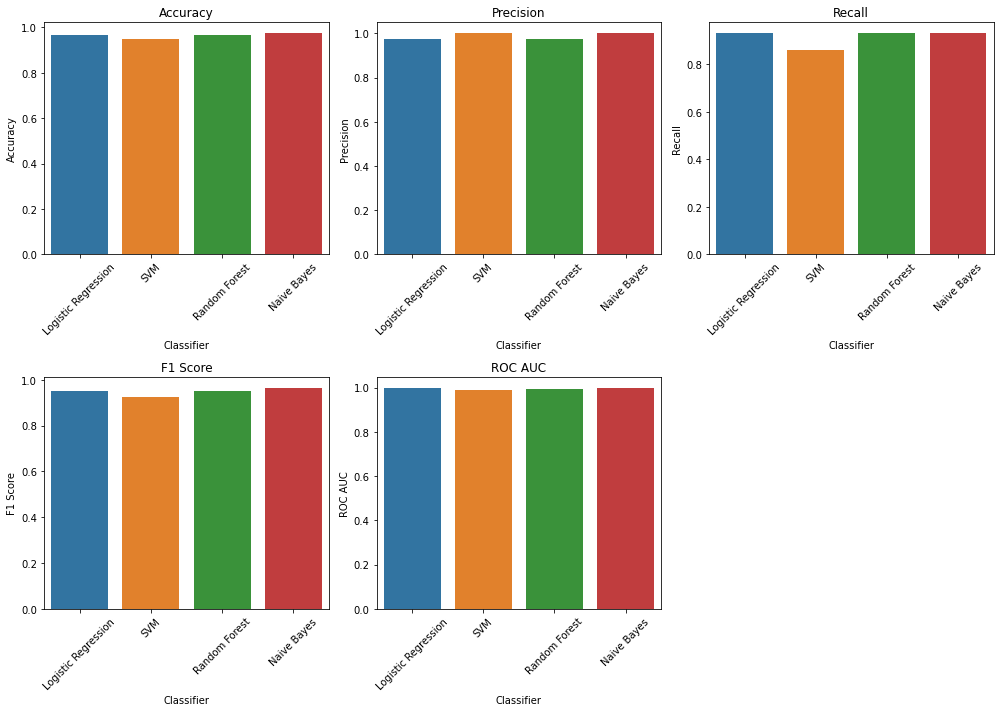

Classifier  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.964912    0.97561  0.930233  0.952381  0.998035
1                  SVM  0.947368    1.00000  0.860465  0.925000  0.990829
2        Random Forest  0.964912    0.97561  0.930233  0.952381  0.995578
3          Naive Bayes  0.973684    1.00000  0.930233  0.963855  0.998362

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

# Initialize a dictionary to store performance metrics for each classifier
performance_metrics = {
    'Classifier': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC': []
}

# Loop through each classifier and fit the model, make predictions, and calculate metrics
for name, clf in classifiers.items():
    # Fit the model using the top 10 features
    clf.fit(X_train_top, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test_top)
    y_proba = clf.predict_proba(X_test_top)[:, 1]
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    # Store the metrics
    performance_metrics['Classifier'].append(name)
    performance_metrics['Accuracy'].append(accuracy)
    performance_metrics['Precision'].append(precision)
    performance_metrics['Recall'].append(recall)
    performance_metrics['F1 Score'].append(f1)
    performance_metrics['ROC AUC'].append(roc_auc)

# Convert the performance metrics to a DataFrame for easy visualization
performance_df = pd.DataFrame(performance_metrics)

# Plotting the performance metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(14, 10))

# Loop through each performance metric for plotting
for i, metric in enumerate(performance_df.columns[1:], 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='Classifier', y=metric, data=performance_df)
    plt.title(metric)
    plt.xticks(rotation=45)

# Display the plots
plt.tight_layout()
plt.show()

performance_df


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


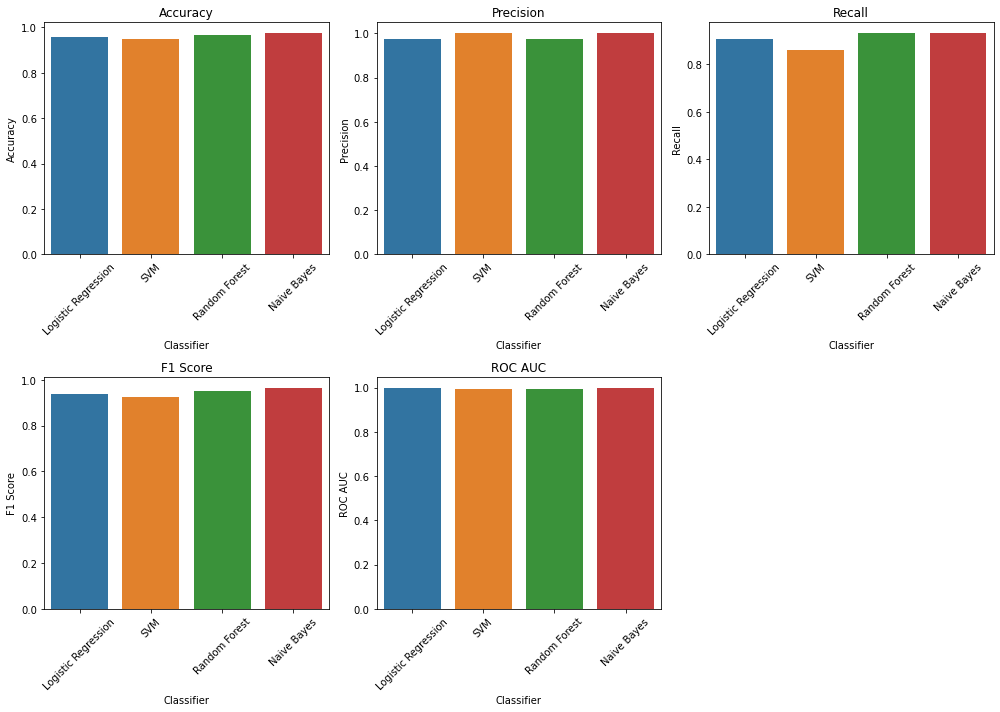

Classifier  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.956140    0.97500  0.906977  0.939759  0.998362
1                  SVM  0.947368    1.00000  0.860465  0.925000  0.993449
2        Random Forest  0.964912    0.97561  0.930233  0.952381  0.995251
3          Naive Bayes  0.973684    1.00000  0.930233  0.963855  0.998362

In [7]:
# ALl features 

# Initialize a dictionary to store performance metrics for each classifier with all features
metricsallfeatures = {
    'Classifier': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC': []
}

# Loop through each classifier and fit the model, make predictions, and calculate metrics
for name, clf in classifiers.items():
    # Fit the model using all features
    clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    # Store the metrics
    metricsallfeatures['Classifier'].append(name)
    metricsallfeatures['Accuracy'].append(accuracy)
    metricsallfeatures['Precision'].append(precision)
    metricsallfeatures['Recall'].append(recall)
    metricsallfeatures['F1 Score'].append(f1)
    metricsallfeatures['ROC AUC'].append(roc_auc)

# Convert the performance metrics to a DataFrame for easy visualization
performance_df_all_features = pd.DataFrame(metricsallfeatures)

# Plotting the performance metrics
plt.figure(figsize=(14, 10))

# Loop through each performance metric for plotting
for i, metric in enumerate(performance_df_all_features.columns[1:], 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='Classifier', y=metric, data=performance_df_all_features)
    plt.title(metric)
    plt.xticks(rotation=45)

# Display the plots
plt.tight_layout()
plt.show()

performance_df_all_features


In [ ]:
# Observations:

#     Logistic Regression and Random Forest again achieve high performance metrics, similar to when using only the top 10 features.
#     SVM maintains high precision but still has a slightly lower recall and F1 score.
#     Naive Bayes again has the highest accuracy and ROC AUC among all the classifiers.

In [ ]:
# Applying forward selection

In [8]:
# Re-initialize Naive Bayes classifier
nb_classifier = GaussianNB()

# Initialize variables for forward selection
selected_features_forward = []
highest_accuracy = 0
all_features = list(X_train.columns)

# Forward selection loop
for i in range(len(all_features)):
    best_feature = None
    for feature in all_features:
        if feature not in selected_features_forward:
            # Add the feature to the list of selected features
            current_features = selected_features_forward + [feature]
            
            # Subset the features
            X_train_subset = X_train[current_features]
            X_test_subset = X_test[current_features]
            
            # Fit the Naive Bayes model and calculate accuracy
            nb_classifier.fit(X_train_subset, y_train)
            y_pred_subset = nb_classifier.predict(X_test_subset)
            accuracy_subset = accuracy_score(y_test, y_pred_subset)
            
            # Check if accuracy improves
            if accuracy_subset > highest_accuracy:
                highest_accuracy = accuracy_subset
                best_feature = feature
                
    # If we've found a feature that improves accuracy, add it to the list of selected features
    if best_feature is not None:
        selected_features_forward.append(best_feature)
        highest_accuracy = accuracy_subset

selected_features_forward, highest_accuracy


(['radius_worst',
  'smoothness_worst',
  'compactness_mean',
  'smoothness_se',
  'fractal_dimension_mean',
  'texture_se',
  'concavity_se',
  'perimeter_worst',
  'texture_mean'],
 0.9824561403508771)

In [ ]:
#     radius_worst
#     smoothness_worst
#     compactness_mean
#     smoothness_se
#     fractal_dimension_mean
#     texture_se
#     concavity_se
#     perimeter_worst
#     texture_mean

# The model achieved an accuracy of approximately 98.25%98.25%.

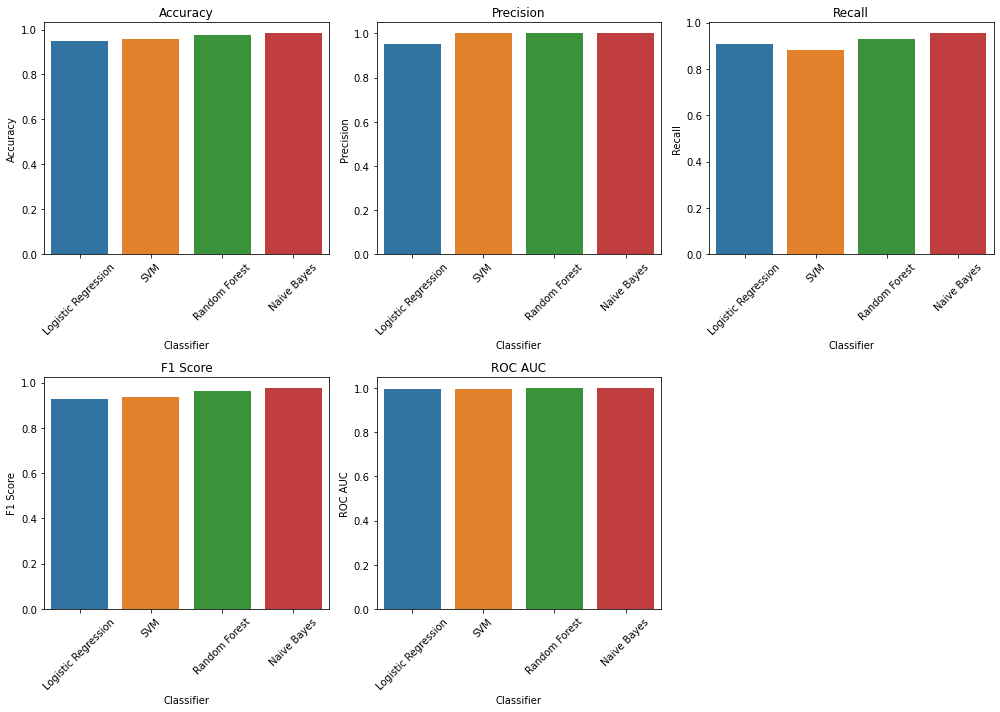

Classifier  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.947368    0.95122  0.906977  0.928571  0.995414
1                  SVM  0.956140    1.00000  0.883721  0.938272  0.996069
2        Random Forest  0.973684    1.00000  0.930233  0.963855  0.999345
3          Naive Bayes  0.982456    1.00000  0.953488  0.976190  0.998690

In [9]:
# Initialize a dictionary to store performance metrics for each classifier with selected features from forward selection
forward_metrics = {
    'Classifier': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC': []
}

# Subset the training and testing data based on the selected features from forward selection
X_train_forward = X_train[selected_features_forward]
X_test_forward = X_test[selected_features_forward]

# Loop through each classifier and fit the model, make predictions, and calculate metrics
for name, clf in classifiers.items():
    # Fit the model using the selected features
    clf.fit(X_train_forward, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test_forward)
    y_proba = clf.predict_proba(X_test_forward)[:, 1]
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    # Store the metrics
    forward_metrics['Classifier'].append(name)
    forward_metrics['Accuracy'].append(accuracy)
    forward_metrics['Precision'].append(precision)
    forward_metrics['Recall'].append(recall)
    forward_metrics['F1 Score'].append(f1)
    forward_metrics['ROC AUC'].append(roc_auc)

# Convert the performance metrics to a DataFrame for easy visualization
performance_df_forward = pd.DataFrame(forward_metrics)

# Plotting the performance metrics
plt.figure(figsize=(14, 10))

# Loop through each performance metric for plotting
for i, metric in enumerate(performance_df_forward.columns[1:], 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='Classifier', y=metric, data=performance_df_forward)
    plt.title(metric)
    plt.xticks(rotation=45)

# Display the plots
plt.tight_layout()
plt.show()

performance_df_forward


In [ ]:
    # Logistic Regression and SVM have good performance metrics, although slightly lower than when using all features or the top 10 RFE features.
    # Random Forest and Naive Bayes have excellent performance metrics, with accuracy, precision, and ROC AUC nearing 1.

In [11]:
# Backward selection 

In [12]:
from sklearn.feature_selection import SequentialFeatureSelector
# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize backward selection feature selector using Random Forest
backward_selector = SequentialFeatureSelector(rf, n_features_to_select=None, direction='backward', scoring='accuracy')

# Fit the backward selector
backward_selector = backward_selector.fit(X_train, y_train)

# Get the mask of selected features
selected_mask_backward = backward_selector.get_support()

# Get the names of the selected features based on the mask
selected_features_backward = X.columns[selected_mask_backward]

# Display the selected features based on backward selection
selected_features_backward.tolist()

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\feature_selection\_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


['texture_mean',
 'perimeter_mean',
 'area_mean',
 'fractal_dimension_mean',
 'texture_se',
 'perimeter_se',
 'smoothness_se',
 'symmetry_se',
 'fractal_dimension_se',
 'texture_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concave points_worst',
 'symmetry_worst']

In [ ]:
# Manual implementation of backward feature selection using SVM as the classifier

# Initialize variables for backward selection
selected_features_backward = list(X_train.columns)  # Start with all features
highest_accuracy_backward = 0  # Initialize highest accuracy

# Initialize the SVM classifier
svm_classifier = SVC(probability=True, random_state=42)

# Backward selection loop
while len(selected_features_backward) > 1:
    worst_feature = None
    for feature in selected_features_backward:
        # Remove the feature from the list of selected features
        current_features = [f for f in selected_features_backward if f != feature]
        
        # Subset the features
        X_train_subset = X_train[current_features]
        X_test_subset = X_test[current_features]
        
        # Fit the SVM model and calculate accuracy
        svm_classifier.fit(X_train_subset, y_train)
        y_pred_subset = svm_classifier.predict(X_test_subset)
        accuracy_subset = accuracy_score(y_test, y_pred_subset)
        
        # Check if accuracy improves
        if accuracy_subset > highest_accuracy_backward:
            highest_accuracy_backward = accuracy_subset
            worst_feature = feature
    
    # If we've found a feature that improves accuracy when removed, remove it from the list of selected features
    if worst_feature is not None:
        selected_features_backward.remove(worst_feature)

selected_features_backward, highest_accuracy_backward


In [ ]:
# ['texture_mean',
#  'perimeter_mean',
#  'area_mean',
#  'fractal_dimension_mean',
#  'texture_se',
#  'perimeter_se',
#  'smoothness_se',
#  'symmetry_se',
#  'fractal_dimension_se',
#  'texture_worst',
#  'area_worst',
#  'smoothness_worst',
#  'compactness_worst',
#  'concave points_worst',
#  'symmetry_worst']

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


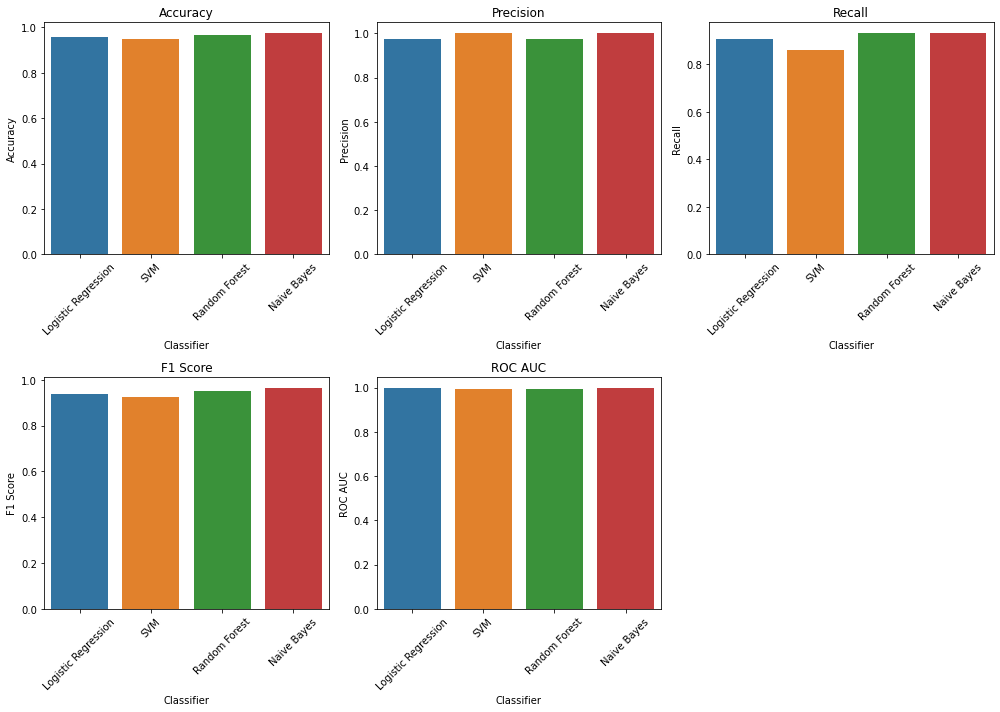

Classifier  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.956140    0.97500  0.906977  0.939759  0.998035
1                  SVM  0.947368    1.00000  0.860465  0.925000  0.993449
2        Random Forest  0.964912    0.97561  0.930233  0.952381  0.995414
3          Naive Bayes  0.973684    1.00000  0.930233  0.963855  0.998035

In [14]:
# Initialize a dictionary to store performance metrics for each classifier with selected features from backward selection
# Assuming the variable selected_features_backward contains the list of selected features from your own run
backward_metrics = {
    'Classifier': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC': []
}

# Subset the training and testing data based on the selected features from backward selection
# Replace 'selected_features_backward' with your list if different
X_train_backward = X_train[selected_features_backward]
X_test_backward = X_test[selected_features_backward]

# Loop through each classifier and fit the model, make predictions, and calculate metrics
for name, clf in classifiers.items():
    # Fit the model using the selected features
    clf.fit(X_train_backward, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test_backward)
    y_proba = clf.predict_proba(X_test_backward)[:, 1]
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    # Store the metrics
    backward_metrics['Classifier'].append(name)
    backward_metrics['Accuracy'].append(accuracy)
    backward_metrics['Precision'].append(precision)
    backward_metrics['Recall'].append(recall)
    backward_metrics['F1 Score'].append(f1)
    backward_metrics['ROC AUC'].append(roc_auc)

# Convert the performance metrics to a DataFrame for easy visualization
performance_df_backward = pd.DataFrame(backward_metrics)

# Plotting the performance metrics
plt.figure(figsize=(14, 10))

# Loop through each performance metric for plotting
for i, metric in enumerate(performance_df_backward.columns[1:], 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='Classifier', y=metric, data=performance_df_backward)
    plt.title(metric)
    plt.xticks(rotation=45)

# Display the plots
plt.tight_layout()
plt.show()

performance_df_backward
